In [1]:
# 代码来源：https://blog.csdn.net/xijuezhu8128/article/details/111303986

In [ ]:
# 原始cv2版本，现在卸载了
import cv2
print(cv2.__version__)

4.5.1


In [3]:
import cv2

# 检查是否能访问 ximgproc 的核心功能（如 jointBilateralFilter）
if hasattr(cv2.ximgproc, 'jointBilateralFilter'):
    print("ximgproc 模块安装成功！")
else:
    print("ximgproc 模块缺失！")
import cv2
print("OpenCV 版本：", cv2.__version__)  # 打印核心模块版本，间接确认扩展模块版本

ximgproc 模块安装成功！
OpenCV 版本： 4.12.0


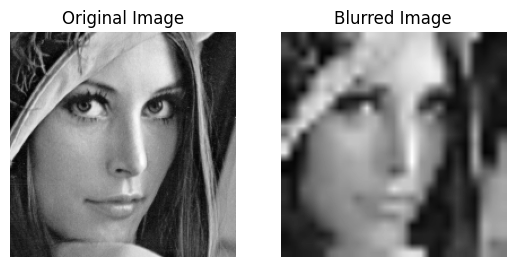

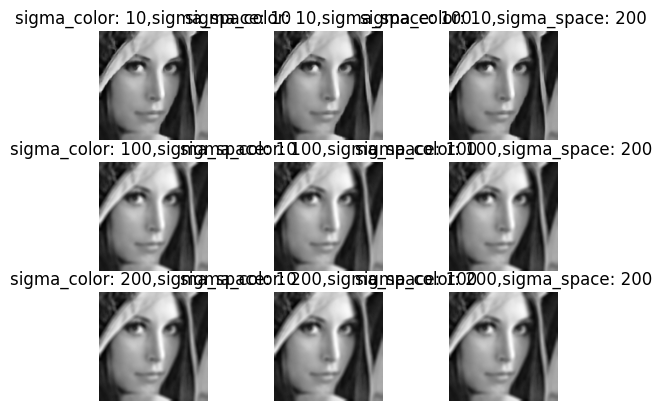

In [5]:
import cv2
import matplotlib.pyplot as plt

if __name__ == "__main__":
    image = cv2.imread('lena512.bmp', 0)[200:400, 200:400]
    blur_img = cv2.resize(image, (25, 25))
    blur_img = cv2.resize(blur_img, (200, 200))
    plt.subplot(1, 2, 1)
    plt.axis('off')
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.axis('off')
    plt.title('Blurred Image')
    plt.imshow(blur_img, cmap='gray')
    plt.show()
    for i, sigma_color in enumerate([10, 100, 200]):
        for j, sigma_space in enumerate([10, 100, 200]):
            bf_img = cv2.ximgproc.jointBilateralFilter(blur_img, image, 9, sigma_color, sigma_space)
            plt.subplot(3, 3, i*3+j+1)
            plt.axis('off')
            plt.title('sigma_color: %d,sigma_space: %d' % (sigma_color, sigma_space))
            plt.imshow(bf_img, cmap='gray')
    plt.show()


sigma_color:%d	sigma_space:%d 25.5 80.0
run the filter


Text(0.5, 1.0, 'filtered_edge_map')

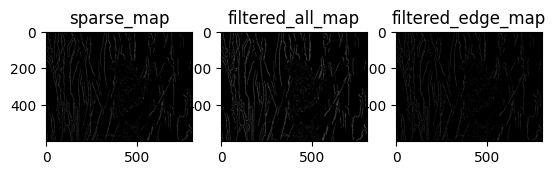

In [10]:
# 实现论文中的JBF滤波

# input:sparese_map,edge_map,original_map,sigma_color,sigma_spaece
# output:filtered_edge_map
import cv2
import numpy as np
import matplotlib.pyplot as plt
sparse_map = cv2.imread("input1.png_sparse_bmap.png",0)
edge_map = cv2.imread("input1.png_edge_map.png",0)
original_map = cv2.imread("input1.png",0)
h,w = sparse_map.shape
sigma_color = original_map.max()/10
sigma_space = max(h,w)/10
print("sigma_color:%d\tsigma_space:%d",sigma_color,sigma_space)



print("run the filter")

filtered_all_map = cv2.ximgproc.jointBilateralFilter(original_map,sparse_map,d=3,sigmaColor=sigma_color,sigmaSpace=sigma_space)

# the edge mask
edge_mask = edge_map/255  # 1：edge 0：background
filtered_edge_map = edge_mask*filtered_all_map + (1-edge_mask)*sparse_map
cv2.imwrite("input1.png_filtered_edge_sparse_map.png",filtered_edge_map)

plt.subplot(1,3,1)
plt.imshow(sparse_map,cmap='gray')
plt.title('sparse_map')
plt.subplot(1,3,2) 
plt.imshow(filtered_all_map,cmap='gray')
plt.title('filtered_all_map')
plt.subplot(1,3,3)
plt.imshow(filtered_edge_map,cmap='gray')
plt.title('filtered_edge_map')





Text(0.5, 1.0, 'diff_map')

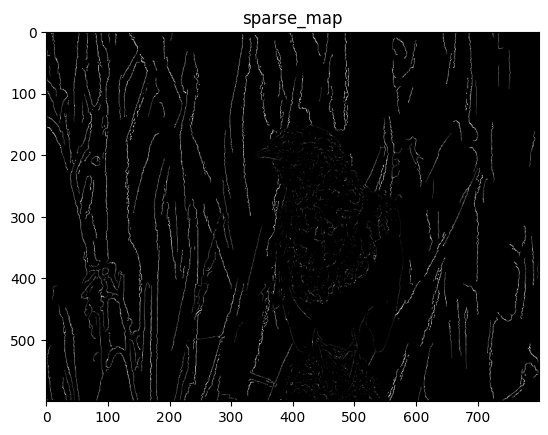

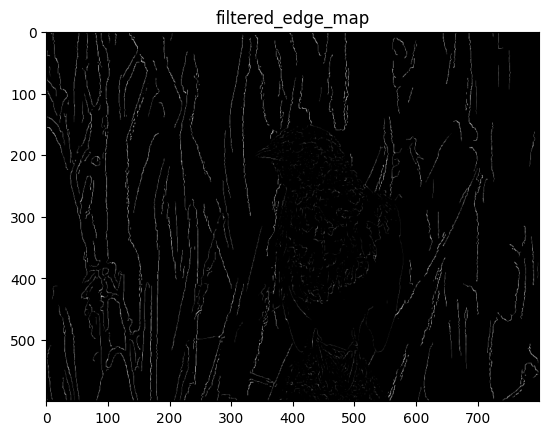

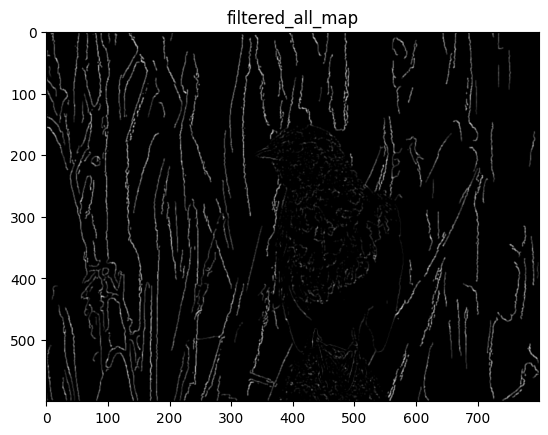

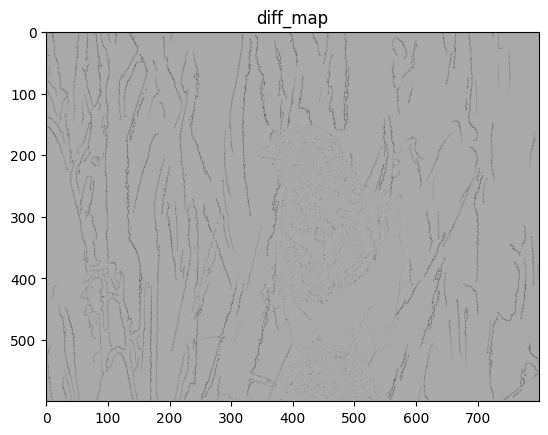

In [11]:
diff_map = filtered_edge_map - sparse_map

plt.figure()
plt.imshow(sparse_map,cmap='gray')
plt.title('sparse_map')

plt.figure()
plt.imshow(filtered_edge_map,cmap='gray')
plt.title('filtered_edge_map')

plt.figure()
plt.imshow(filtered_all_map,cmap='gray')
plt.title('filtered_all_map')

plt.figure()
plt.imshow(diff_map,cmap='gray')
plt.title('diff_map')


AttributeError: 'numpy.ndarray' object has no attribute 'values'